<a href="https://colab.research.google.com/github/narmis15/imagerecongition/blob/main/imagerecongintion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q kaggle# Install Kaggle API package (quiet mode)


/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `pip install -q kaggle# Install Kaggle API package (quiet mode)'


In [4]:
# Upload kaggle.json for Kaggle API authentication
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"simranswarnkar","key":"79fa629fbd646ad6478a8542b4077880"}'}

In [5]:
# Create .kaggle directory and copy kaggle.json there with correct permissions
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
# Import kagglehub package and download the MNIST dataset from Kaggle
import kagglehub

path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [8]:
import tensorflow as tf# Load MNIST dataset from TensorFlow datasets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28), Test shape: (10000, 28, 28)


In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0
# Reshape data to add channel dimension (grayscale images: 28x28x1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
print(f"Train reshaped: {X_train.shape}")


Train reshaped: (60000, 28, 28, 1)


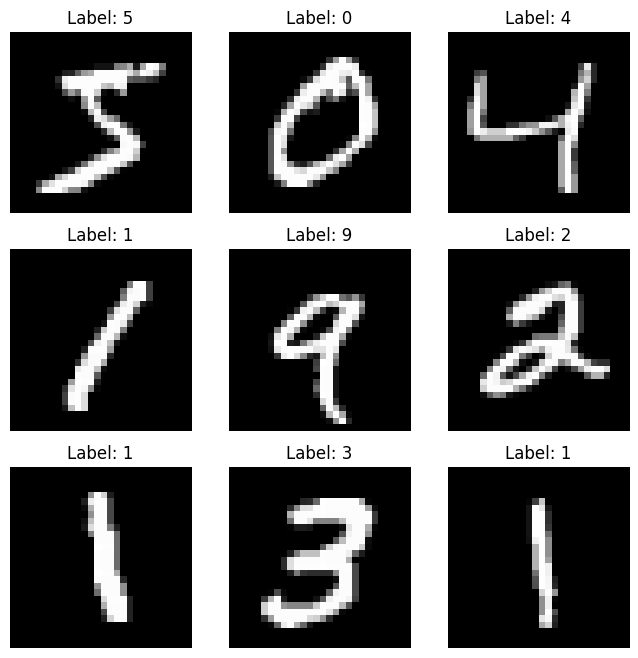

In [10]:
# Visualize the first 9 training images with their labels
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [13]:
# Load CIFAR-10 dataset (colored images, 32x32x3) from TensorFlow datasets
(X_train_c10, y_train_c10), (X_test_c10, y_test_c10) = tf.keras.datasets.cifar10.load_data()
X_train_c10 = X_train_c10 / 255.0 # Normalize CIFAR-10 pixel values
X_test_c10 = X_test_c10 / 255.0
print(f"CIFAR-10 train shape: {X_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
CIFAR-10 train shape: (50000, 32, 32, 3)


In [14]:
from tensorflow.keras.models import Sequential # Define a simple CNN model for MNIST dataset
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),# Conv layer with 32 filters
    MaxPooling2D(2,2), # Max pooling for downsampling
    Conv2D(64, (3,3), activation='relu'),# Conv layer with 32 filters
    MaxPooling2D(2,2),# Max pooling layer
    Flatten(),# Flatten 2D features to 1D
    Dense(128, activation='relu'), # Fully connected dense layer
    Dense(10, activation='softmax') # Output layer for 10 classes
])
# Compile model with Adam optimizer and sparse categorical cross-entropy loss for classification
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
# Train model on MNIST training data with 20% validation split over 5 epochs and batch size 32
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8921 - loss: 0.3451 - val_accuracy: 0.9807 - val_loss: 0.0673
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9836 - loss: 0.0526 - val_accuracy: 0.9852 - val_loss: 0.0517
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9903 - loss: 0.0318 - val_accuracy: 0.9855 - val_loss: 0.0518
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9937 - loss: 0.0207 - val_accuracy: 0.9899 - val_loss: 0.0346
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9948 - loss: 0.0150 - val_accuracy: 0.9897 - val_loss: 0.0390


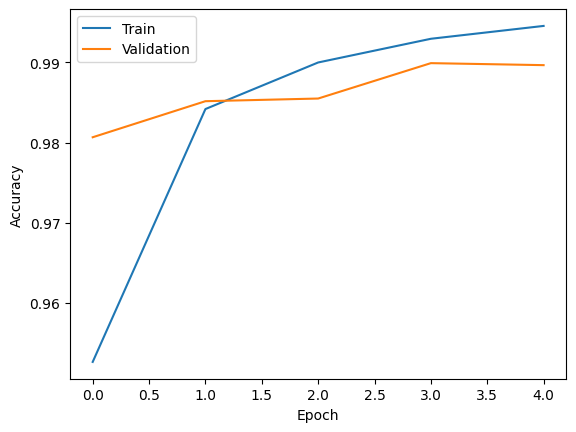

In [16]:
# Plot training and validation accuracy per epoch
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test)# Plot training and validation accuracy per epoch
print(f"Test accuracy: {test_acc:.4f}")
# Predict labels on MNIST test set
y_pred = model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9871 - loss: 0.0390
Test accuracy: 0.9897
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [18]:
# Define an improved CNN model with Dropout for regularization on MNIST data
from tensorflow.keras.layers import Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
# Compile model again for training
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Data augmentation setup for CIFAR-10 dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15, # Random rotation by 15 degrees
    width_shift_range=0.1, # Horizontal shift by 10%
    height_shift_range=0.1, # Vertical shift by 10%
    horizontal_flip=True # Random horizontal flip
)
# Fit data generator on CIFAR-10 training images
datagen.fit(X_train_c10)

In [20]:
# Define a deeper CNN model with Batch Normalization and Dropout for CIFAR-10
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),     # High dropout to reduce overfitting
    Dense(10, activation='softmax')
])
# Compile model with Adam optimizer and lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train model on augmented CIFAR-10 training batches with validation on test set
model.fit(datagen.flow(X_train_c10, y_train_c10, batch_size=32), epochs=20,
          validation_data=(X_test_c10, y_test_c10))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - accuracy: 0.2719 - loss: 1.9823 - val_accuracy: 0.4820 - val_loss: 1.4636
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.4514 - loss: 1.5206 - val_accuracy: 0.5300 - val_loss: 1.3292
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.5036 - loss: 1.3822 - val_accuracy: 0.5404 - val_loss: 1.2951
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.5408 - loss: 1.2916 - val_accuracy: 0.5850 - val_loss: 1.1898
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step - accuracy: 0.5597 - loss: 1.2301 - val_accuracy: 0.6171 - val_loss: 1.1062
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5792 - loss: 1.1804 - val_accuracy: 0.6284 - val_loss: 1.0625
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.6003 - loss: 1.1353 - val_accuracy: 0.6152 - val_loss: 1.0920
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6122 - loss: 1.09

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.79      0.72      0.76      1000
           1       0.79      0.88      0.83      1000
           2       0.74      0.51      0.61      1000
           3       0.64      0.42      0.51      1000
           4       0.72      0.62      0.67      1000
           5       0.69      0.58      0.63      1000
           6       0.63      0.91      0.74      1000
           7       0.70      0.80      0.75      1000
           8       0.89      0.74      0.81      1000
           9       0.63      0.92      0.75      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.70     10000
weighted avg       0.72      0.71      0.70     10000



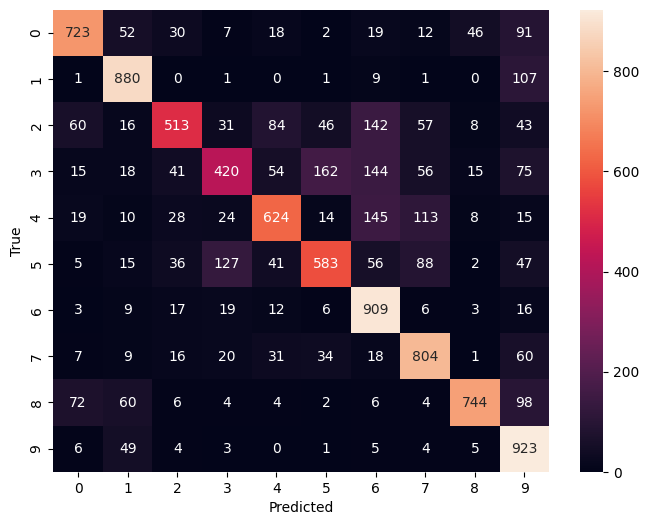

In [21]:
# Generate predictions on CIFAR-10 test data and create confusion matrix & classification report
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred_c10 = model.predict(X_test_c10).argmax(axis=1)
cm = confusion_matrix(y_test_c10, y_pred_c10)
print(classification_report(y_test_c10, y_pred_c10))

# Visualize confusion matrix using seaborn heatmap

import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [22]:
!kaggle datasets download -d tongpython/cat-and-dog   # Download Cats vs Dogs dataset from Kaggle for binary classification


Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 53% 116M/218M [00:00<00:00, 1.21GB/s]
100% 218M/218M [00:00<00:00, 852MB/s] 


In [23]:
import zipfile    # Extract dataset zip file

with zipfile.ZipFile('/content/cat-and-dog.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/dogs-vs-cats')

In [24]:
# Prepare ImageDataGenerator for Cats vs Dogs dataset with rescaling and validation split

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Generate training batches with images resized to 224x224 and binary class mode
train_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)
# Generate validation batches similarly
val_generator = datagen.flow_from_directory(
    '/content/dogs-vs-cats',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [25]:
# Import MobileNetV2 pretrained model for transfer learning (without top layers)
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False  # Freeze base layers

# Build classification model on top of base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')    # Sigmoid output for binary classification
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=5, validation_data=val_generator)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 42s 129ms/step - accuracy: 0.7956 - loss: 0.5479 - val_accuracy: 0.7985 - val_loss: 0.5149
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 74ms/step - accuracy: 0.7998 - loss: 0.4999 - val_accuracy: 0.7985 - val_loss: 0.5107
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 75ms/step - accuracy: 0.8053 - loss: 0.4765 - val_accuracy: 0.7985 - val_loss: 0.5167
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.7945 - loss: 0.4741 - val_accuracy: 0.7786 - val_loss: 0.5521
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 76ms/step - accuracy: 0.8042 - loss: 0.4476 - val_accuracy: 0.7965 - val_loss: 0.5594


In [26]:
base_model.trainable = True
model = Sequential([
    base_model,
    GlobalAveragePooling2D(), # Add GlobalAveragePooling2D here
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_generator, epochs=3, validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 98s 216ms/step - accuracy: 0.7614 - loss: 0.5521 - val_accuracy: 0.7895 - val_loss: 0.5268
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 36s 116ms/step - accuracy: 0.8005 - loss: 0.4892 - val_accuracy: 0.7945 - val_loss: 0.5238
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 29s 117ms/step - accuracy: 0.7932 - loss: 0.4750 - val_accuracy: 0.7935 - val_loss: 0.5271


In [27]:
model.save('mobilenet_cats_dogs.h5')

import tensorflow as tf
loaded_model = tf.keras.models.load_model('mobilenet_cats_dogs.h5')

63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 103ms/step


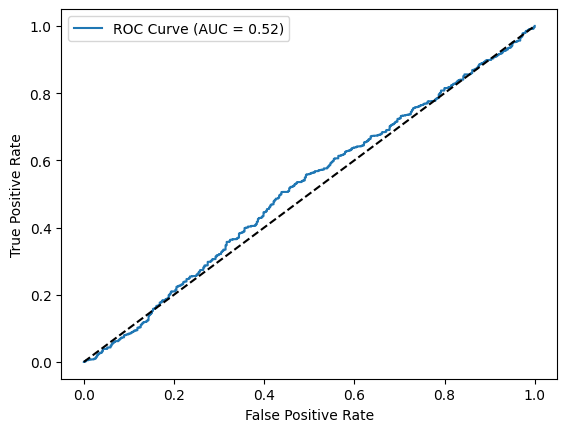

In [28]:
from sklearn.metrics import roc_curve, auc    # Import ROC curve and AUC metrics for evaluation

# Predict probabilities for validation data
y_pred_proba = loaded_model.predict(val_generator)
fpr, tpr, _ = roc_curve(val_generator.classes, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [29]:
from google.colab import files  # Upload an image file to test prediction
uploaded = files.upload()  # Upload e.g. 'cat.jpg'

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = 'dog.jpg'  # Replace with your filename
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Predict class of uploaded image
prediction = loaded_model.predict(img_array)
print("Predicted class:", "Dog" if prediction[0][0] > 0.5 else "Cat")

Saving dog.jpg to dog (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predicted class: Dog


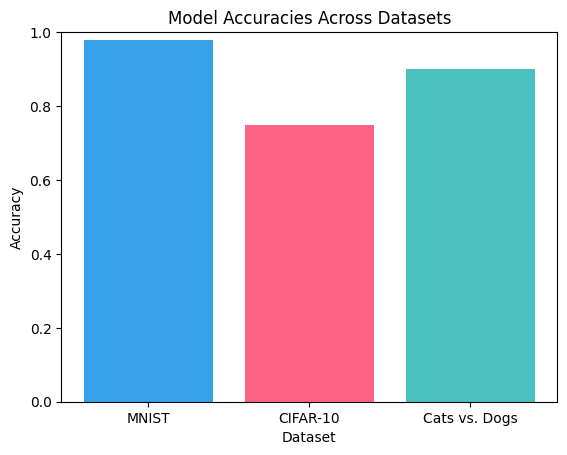

In [30]:
import matplotlib.pyplot as plt# Plot a bar chart comparing accuracies of models on different datasets
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies = [0.98, 0.75, 0.90]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()